In [56]:
import umap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [33]:
kr_df = pd.read_csv('../Data/KR_map.csv', index_col=0)
kr_embeddings = np.array(kr_df['KR_embedding'].apply(lambda x: x.replace('[', '').replace(']', '').split(',')).apply(lambda x: [float(i) for i in x]).to_list())
en_df = pd.read_csv('../Data/EN_map.csv', index_col=0)
en_embeddings = np.array(en_df['EN_embedding'].apply(lambda x: x.replace('[', '').replace(']', '').split(',')).apply(lambda x: [float(i) for i in x]).to_list())
kr_embeddings.shape, en_embeddings.shape

((403, 2048), (450, 2048))

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


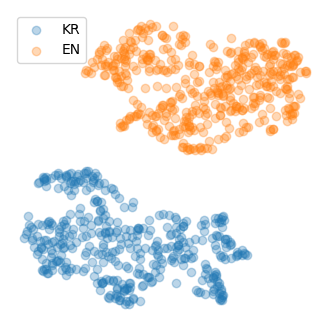

In [55]:
# Create UMAP instances
reducer_kr = umap.UMAP(random_state=0)
reducer_en = umap.UMAP(random_state=0)

# Fit and transform the embeddings
kr_umap_embeddings = reducer_kr.fit_transform(kr_embeddings)
en_umap_embeddings = reducer_en.fit_transform(en_embeddings)

# Create the plot
plt.figure(figsize=(4, 4))

# Plot the Korean embeddings
plt.scatter(kr_umap_embeddings[:, 0], kr_umap_embeddings[:, 1], label='KR', alpha=0.3)

# Plot the English embeddings
plt.scatter(en_umap_embeddings[:, 0], en_umap_embeddings[:, 1], label='EN', alpha=0.3)

# Remove x and y ticks
plt.xticks([])
plt.yticks([])

# Remove the spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Add a legend
plt.legend()

# Show the plot
plt.show()

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


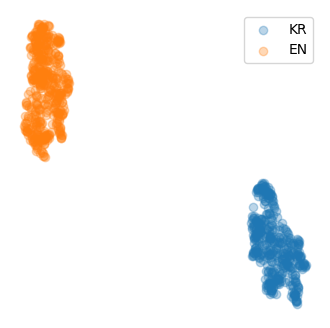

In [54]:
# Concatenate the embeddings
concat_embeddings = np.concatenate((kr_embeddings, en_embeddings), axis=0)

# Create a UMAP instance
reducer = umap.UMAP(random_state=0)

# Fit and transform the concatenated embeddings
umap_embeddings = reducer.fit_transform(concat_embeddings)

# Create the plot
plt.figure(figsize=(4, 4))

# Plot the Korean embeddings
plt.scatter(umap_embeddings[:len(kr_embeddings), 0], umap_embeddings[:len(kr_embeddings), 1], label='KR', alpha=0.3)

# Plot the English embeddings
plt.scatter(umap_embeddings[len(kr_embeddings):, 0], umap_embeddings[len(kr_embeddings):, 1], label='EN', alpha=0.3)

# Remove x and y ticks
plt.xticks([])
plt.yticks([])

# Remove the spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Add a legend
plt.legend()

# Show the plot
plt.show()

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


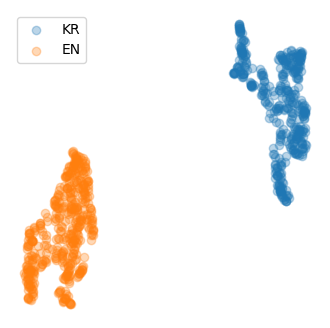

In [57]:
# Create a PCA instance
pca = PCA(n_components=50)

# Fit and transform the concatenated embeddings with PCA
pca_embeddings = pca.fit_transform(concat_embeddings)

# Create a UMAP instance
reducer = umap.UMAP(random_state=0)

# Fit and transform the PCA-reduced embeddings with UMAP
umap_embeddings = reducer.fit_transform(pca_embeddings)

# Create the plot
plt.figure(figsize=(4, 4))

# Plot the Korean embeddings
plt.scatter(umap_embeddings[:len(kr_embeddings), 0], umap_embeddings[:len(kr_embeddings), 1], label='KR', alpha=0.3)

# Plot the English embeddings
plt.scatter(umap_embeddings[len(kr_embeddings):, 0], umap_embeddings[len(kr_embeddings):, 1], label='EN', alpha=0.3)

# Remove x and y ticks
plt.xticks([])
plt.yticks([])

# Remove the spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Add a legend
plt.legend()

# Show the plot
plt.show()

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


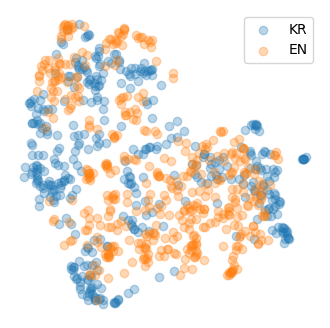

In [60]:
# Create a PCA instance
pca = PCA(n_components=50)

# Fit and transform the embeddings with PCA
kr_pca_embeddings = pca.fit_transform(kr_embeddings)
en_pca_embeddings = pca.fit_transform(en_embeddings)

# Concatenate the PCA-reduced embeddings
pca_concat_embeddings = np.concatenate((kr_pca_embeddings, en_pca_embeddings), axis=0)

# Create a UMAP instance
reducer = umap.UMAP(random_state=0)

# Fit and transform the PCA-reduced concatenated embeddings with UMAP
umap_embeddings = reducer.fit_transform(pca_concat_embeddings)

# Create the plot
plt.figure(figsize=(4, 4))

# Plot the Korean embeddings
plt.scatter(umap_embeddings[:len(kr_pca_embeddings), 0], umap_embeddings[:len(kr_pca_embeddings), 1], label='KR', alpha=0.3)

# Plot the English embeddings
plt.scatter(umap_embeddings[len(kr_pca_embeddings):, 0], umap_embeddings[len(kr_pca_embeddings):, 1], label='EN', alpha=0.3)

# Remove x and y ticks
plt.xticks([])
plt.yticks([])

# Remove the spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Add a legend
plt.legend()

# Show the plot
plt.show()

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


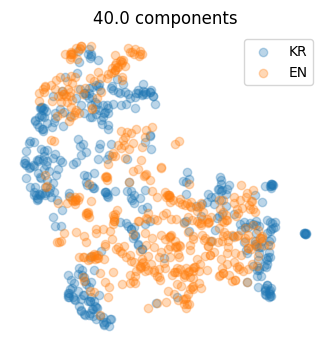

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


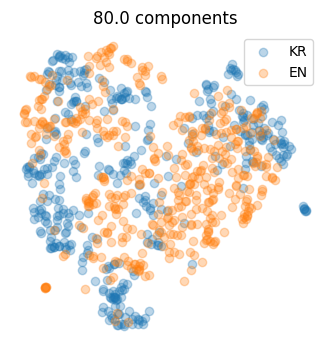

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


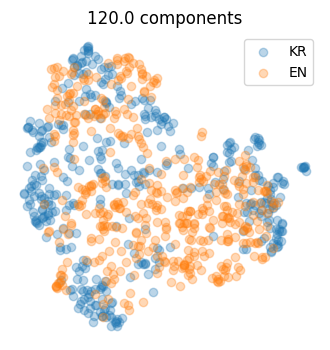

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


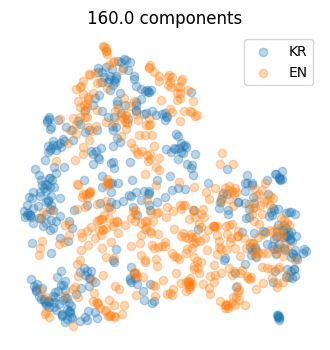

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


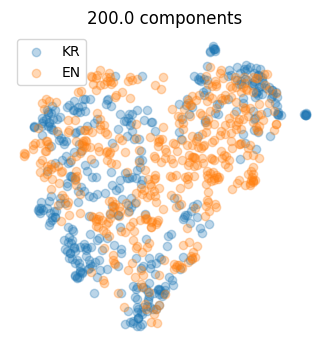

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


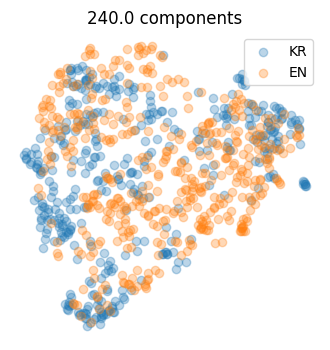

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


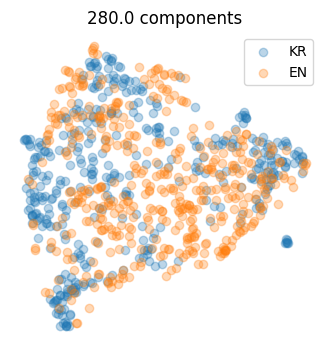

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


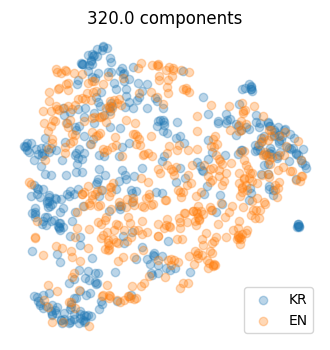

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


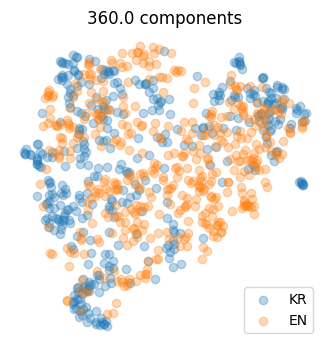

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


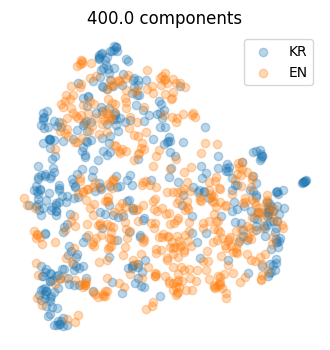

In [64]:
# List of percentages to try
percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for percentage in percentages:
    # Calculate the number of components
    n_components = int(400 * percentage) # 400 because max allowable components is 409

    # Create a PCA instance
    pca = PCA(n_components=n_components)

    # Fit and transform the embeddings with PCA
    kr_pca_embeddings = pca.fit_transform(kr_embeddings)
    en_pca_embeddings = pca.fit_transform(en_embeddings)

    # Concatenate the PCA-reduced embeddings
    pca_concat_embeddings = np.concatenate((kr_pca_embeddings, en_pca_embeddings), axis=0)

    # Create a UMAP instance
    reducer = umap.UMAP(random_state=0)

    # Fit and transform the PCA-reduced concatenated embeddings with UMAP
    umap_embeddings = reducer.fit_transform(pca_concat_embeddings)

    # Create the plot
    plt.figure(figsize=(4, 4))

    # Plot the Korean embeddings
    plt.scatter(umap_embeddings[:len(kr_pca_embeddings), 0], umap_embeddings[:len(kr_pca_embeddings), 1], label='KR', alpha=0.3)

    # Plot the English embeddings
    plt.scatter(umap_embeddings[len(kr_pca_embeddings):, 0], umap_embeddings[len(kr_pca_embeddings):, 1], label='EN', alpha=0.3)

    # Remove x and y ticks
    plt.xticks([])
    plt.yticks([])

    # Remove the spines
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    # Add a legend
    plt.legend()

    # Add a title
    plt.title(f'{percentage * 400} components')

    # Show the plot
    plt.show()

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


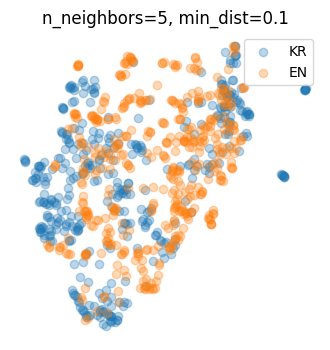

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


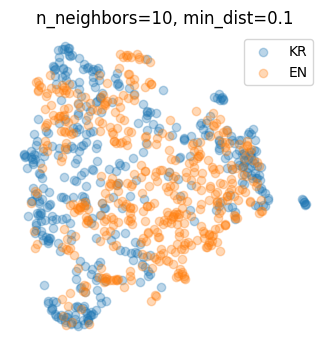

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


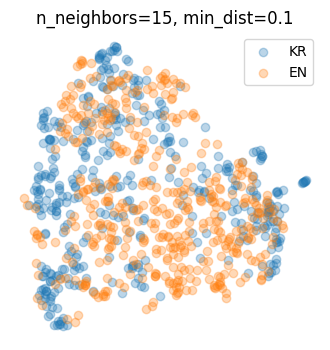

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


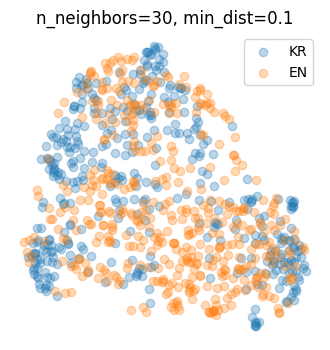

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


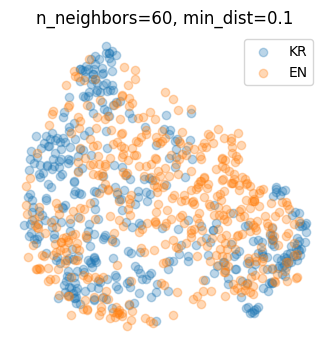

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


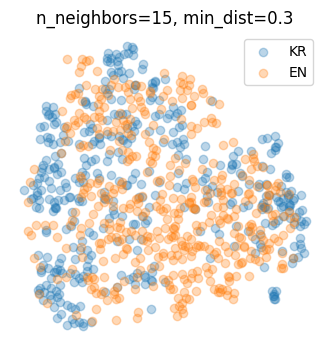

/mnt/sphere/projects/simon/COGS209SP24-Project2-GroupNeuromorphs/pyenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


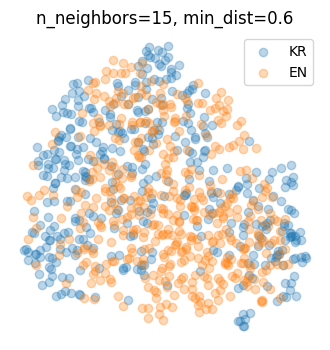

In [67]:
# Create a PCA instance
pca = PCA(n_components=400)

# Fit and transform the embeddings with PCA
kr_pca_embeddings = pca.fit_transform(kr_embeddings)
en_pca_embeddings = pca.fit_transform(en_embeddings)

# Concatenate the PCA-reduced embeddings
pca_concat_embeddings = np.concatenate((kr_pca_embeddings, en_pca_embeddings), axis=0)

# List of UMAP parameters to try
umap_params = [{'n_neighbors': 5, 'min_dist': 0.1},
               {'n_neighbors': 10, 'min_dist': 0.1},
               {'n_neighbors': 15, 'min_dist': 0.1},
               {'n_neighbors': 30, 'min_dist': 0.1},
               {'n_neighbors': 60, 'min_dist': 0.1},
               {'n_neighbors': 15, 'min_dist': 0.3},
               {'n_neighbors': 15, 'min_dist': 0.6}]

for params in umap_params:
    # Create a UMAP instance with the current parameters
    reducer = umap.UMAP(n_neighbors=params['n_neighbors'], min_dist=params['min_dist'], random_state=0)

    # Fit and transform the PCA-reduced concatenated embeddings with UMAP
    umap_embeddings = reducer.fit_transform(pca_concat_embeddings)

    # Create the plot
    plt.figure(figsize=(4, 4))

    # Plot the Korean embeddings
    plt.scatter(umap_embeddings[:len(kr_pca_embeddings), 0], umap_embeddings[:len(kr_pca_embeddings), 1], label='KR', alpha=0.3)

    # Plot the English embeddings
    plt.scatter(umap_embeddings[len(kr_pca_embeddings):, 0], umap_embeddings[len(kr_pca_embeddings):, 1], label='EN', alpha=0.3)

    # Remove x and y ticks
    plt.xticks([])
    plt.yticks([])

    # Remove the spines
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    # Add a legend
    plt.legend()

    # Add a title
    plt.title(f'n_neighbors={params["n_neighbors"]}, min_dist={params["min_dist"]}')

    # Show the plot
    plt.show()